In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("AQI_HaNoi_Updated.csv")
df.head()

,date,pm25,pm10,o3,no2,so2,co,year,AQI_pm25,AQI_pm10,AQI_o3,AQI_no2,AQI_so2,AQI_co,AQI
0,2019-01-01,36.0,21.0,12.0,22.0,10.0,9.0,NaN,72.0,21.0,3.7500,11.0,4.0,45.0,72.0
1,2019-01-02,34.0,46.0,23.0,13.0,10.0,10.0,NaN,68.0,46.0,7.1875,6.5,4.0,50.0,68.0
2,2019-01-03,47.0,35.0,15.0,19.0,8.0,9.0,NaN,94.0,35.0,4.6875,9.5,3.2,45.0,94.0
3,2019-01-04,53.0,39.0,21.0,15.0,13.0,3.0,NaN,105.0,39.0,6.5625,7.5,5.2,15.0,105.0
4,2019-01-05,40.0,28.0,13.0,12.0,8.0,9.0,NaN,80.0,28.0,4.0625,6.0,3.2,45.0,80.0


In [2]:
train_dates= pd.to_datetime(df['date'])
df = df.drop(columns={'year'})
df

,date,pm25,pm10,o3,no2,so2,co,AQI_pm25,AQI_pm10,AQI_o3,AQI_no2,AQI_so2,AQI_co,AQI
0,2019-01-01,36.0,21.0,12.0,22.0,10.0,9.0,72.000000,21.0,3.7500,11.0,4.0,45.0,72.000000
1,2019-01-02,34.0,46.0,23.0,13.0,10.0,10.0,68.000000,46.0,7.1875,6.5,4.0,50.0,68.000000
2,2019-01-03,47.0,35.0,15.0,19.0,8.0,9.0,94.000000,35.0,4.6875,9.5,3.2,45.0,94.000000
3,2019-01-04,53.0,39.0,21.0,15.0,13.0,3.0,105.000000,39.0,6.5625,7.5,5.2,15.0,105.000000
4,2019-01-05,40.0,28.0,13.0,12.0,8.0,9.0,80.000000,28.0,4.0625,6.0,3.2,45.0,80.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,2024-05-28,85.0,56.0,14.0,1.0,8.0,6.0,153.571429,53.0,4.3750,0.5,3.2,30.0,153.571429
1975,2024-05-29,58.0,50.0,13.0,1.0,8.0,6.0,113.333333,50.0,4.0625,0.5,3.2,30.0,113.333333
1976,2024-05-30,47.0,39.0,10.0,1.0,8.0,8.0,94.000000,39.0,3.1250,0.5,3.2,40.0,94.000000
1977,2024-05-31,48.0,63.0,10.0,1.0,8.0,8.0,96.000000,56.5,3.1250,0.5,3.2,40.0,96.000000


In [3]:
cols = ['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'AQI']
df = df[cols]
df.head()

,date,pm25,pm10,o3,no2,so2,co,AQI
0,2019-01-01,36.0,21.0,12.0,22.0,10.0,9.0,72.0
1,2019-01-02,34.0,46.0,23.0,13.0,10.0,10.0,68.0
2,2019-01-03,47.0,35.0,15.0,19.0,8.0,9.0,94.0
3,2019-01-04,53.0,39.0,21.0,15.0,13.0,3.0,105.0
4,2019-01-05,40.0,28.0,13.0,12.0,8.0,9.0,80.0


In [4]:
# Chia train, test
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]
X_train = train_data.drop(['date', 'AQI'], axis=1)
y_train = train_data['AQI']

X_test = test_data.drop(['date', 'AQI'], axis=1)
y_test = test_data['AQI']

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [6]:
y_pred

array([121.29343198, 215.74907326, 229.19590079, 242.52575893,
       145.07549842, 273.35746199, 230.12039647, 226.19912101,
       214.12987866, 213.23621146, 240.29325443, 247.30283329,
       272.91687006, 251.34919409, 115.42532237, 163.53686695,
       168.52678111, 120.7486303 , 175.39986652, 174.7776212 ,
       186.58270347, 204.08304667, 212.82343262, 135.95049817,
       148.37564952, 163.55828773, 133.51916996, 143.94487674,
       127.76798372, 123.78895609,  89.2334495 , 174.66504182,
       104.3360293 , 106.29230344, 161.52939002, 160.53583982,
       204.80919073, 228.0647034 ,  74.09271337,  82.92460354,
       105.93905928,  89.84666264, 267.47972453, 278.01711174,
       185.33013136, 212.64162674, 157.98958919, 123.72086589,
       190.71753671, 228.0539273 , 168.71893533, 154.72243675,
       148.1325217 , 137.9205413 , 137.56427696,  94.37779213,
        68.67521573, 134.28222919, 177.89871884, 167.69723574,
       157.52707321, 173.69337548,  93.6937369 ,  85.81

In [7]:
# Dự đóa 30 ngày
days_pred_30 = 30
cols = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
_30_next_days_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+29, step=1)
_30_next_days_index

RangeIndex(start=1978, stop=2008, step=1)

In [8]:
pred_30_days = model.predict(X_test[-days_pred_30:])
pred_30_days

array([ 99.97646298, 134.78911019,  83.63058199,  88.75387673,
       150.48563464, 111.75528008,  99.11542539, 127.46114492,
       104.72330105,  97.00760097,  87.06893855, 134.69503791,
       106.47656903, 143.1948699 , 129.77931105,  90.08776055,
        90.63053092, 109.77272735, 145.80507437, 145.10063088,
       148.07024238, 155.13446114,  78.09409731,  69.04711535,
       106.27367811, 138.28260665, 103.59627947,  89.83023069,
        91.77610311, 154.50621743])

In [20]:
# Dự đóa 60 ngày
days_pred_60 = 60
_60_next_days_index = pd.RangeIndex(start=len(df) + 29, stop=len(df)+59, step=1)
pred_60_days = model.predict(X_test[-days_pred_60:])
pred_60_days

array([173.41170484, 156.53234521, 117.00843717, 110.15778823,
       112.23998532,  87.40320908, 132.39020442, 157.13703079,
       138.84637239, 119.84372131,  98.83412098, 105.51775538,
       143.1359649 , 130.57603561,  74.85564912, 133.69814011,
       140.98162858, 117.25490315,  95.67575363, 130.27934475,
       130.56553719, 204.24395386, 164.75636965, 175.52330449,
       183.00431595, 136.7659421 , 147.64612518, 116.09688801,
       109.9083307 ,  95.43620681,  99.97646298, 134.78911019,
        83.63058199,  88.75387673, 150.48563464, 111.75528008,
        99.11542539, 127.46114492, 104.72330105,  97.00760097,
        87.06893855, 134.69503791, 106.47656903, 143.1948699 ,
       129.77931105,  90.08776055,  90.63053092, 109.77272735,
       145.80507437, 145.10063088, 148.07024238, 155.13446114,
        78.09409731,  69.04711535, 106.27367811, 138.28260665,
       103.59627947,  89.83023069,  91.77610311, 154.50621743])

In [22]:
# Dự đóa 90 ngày
days_pred_90 = 90
_90_next_days_index = pd.RangeIndex(start=len(df)+59, stop=len(df)+89, step=1)
pred_90_days = model.predict(X_test[-days_pred_90:])
pred_90_days

array([219.37402546, 283.3379671 , 243.39070356, 198.62906247,
       246.54958246, 224.53374482, 113.67046264, 125.7876013 ,
       219.51018134, 180.41015831, 137.05015579, 168.65347701,
       122.15803736, 131.96768879, 115.66519204, 113.96942225,
       144.1942484 , 196.85581351, 171.43269184, 126.06574155,
       121.52156693, 121.11375184, 121.77688902, 148.94358417,
       144.57483128, 162.88648505, 161.32224583, 169.21280217,
       180.5299956 , 162.359883  , 173.41170484, 156.53234521,
       117.00843717, 110.15778823, 112.23998532,  87.40320908,
       132.39020442, 157.13703079, 138.84637239, 119.84372131,
        98.83412098, 105.51775538, 143.1359649 , 130.57603561,
        74.85564912, 133.69814011, 140.98162858, 117.25490315,
        95.67575363, 130.27934475, 130.56553719, 204.24395386,
       164.75636965, 175.52330449, 183.00431595, 136.7659421 ,
       147.64612518, 116.09688801, 109.9083307 ,  95.43620681,
        99.97646298, 134.78911019,  83.63058199,  88.75

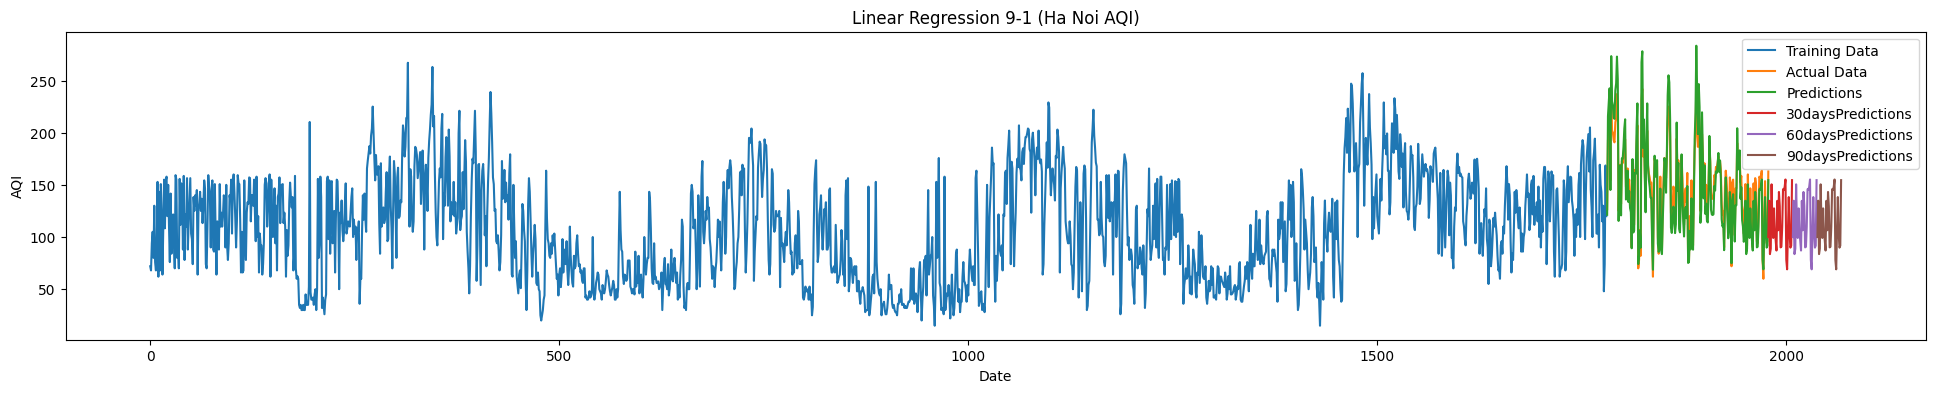

In [24]:
plt.figure(figsize=(24, 4))
plt.plot(train_data.index, train_data['AQI'], label='Training Data')
plt.plot(test_data.index, test_data['AQI'], label='Actual Data')
plt.plot(test_data.index, y_pred, label='Predictions')
plt.plot(_30_next_days_index, pred_30_days, label='30daysPredictions')
plt.plot(_60_next_days_index, pred_60_days[-30:], label='60daysPredictions')
plt.plot(_90_next_days_index, pred_90_days[-30:], label='90daysPredictions')
plt.title('Linear Regression 9-1 (Ha Noi AQI)')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 7.77%
MAE: 11.99
RMSE: 14.53
